# Lecture 18

In [30]:
from abc import ABC, abstractmethod

class Container:
    def __init__(self):
        self.content = []
        
    @property
    def weight(self):
        return sum(c.weight for c in self.content)
    
    @abstractmethod
    def add_items(self, *args):
        raise NotImplementedError()

In [32]:
class Parcel(Container):
    def __init__(self, destination_address, max_weight):
        super().__init__()
        self.destination_address = destination_address
        self.max_weight = max_weight
        
    def add_items(self, *items):
        total_weight = sum(item.weight for item in items)
        if self.weight + total_weight > self.max_weight:
            raise Exception("Can't fit this product into the box")
        self.content.extend(items)

In [33]:
class Box(Container):
    def __init__(self, height, width, length):
        super().__init__()
        self.width = width
        self.length = length
        self.height = height
        
    @property
    def volume(self):
        return self.width * self.length * self.height
        
    def add_items(self, *items):
        self.content.extend(items)

In [34]:
class Product:
    def __init__(self, name, weight):
        self.name = name
        self.weight = weight

<div>
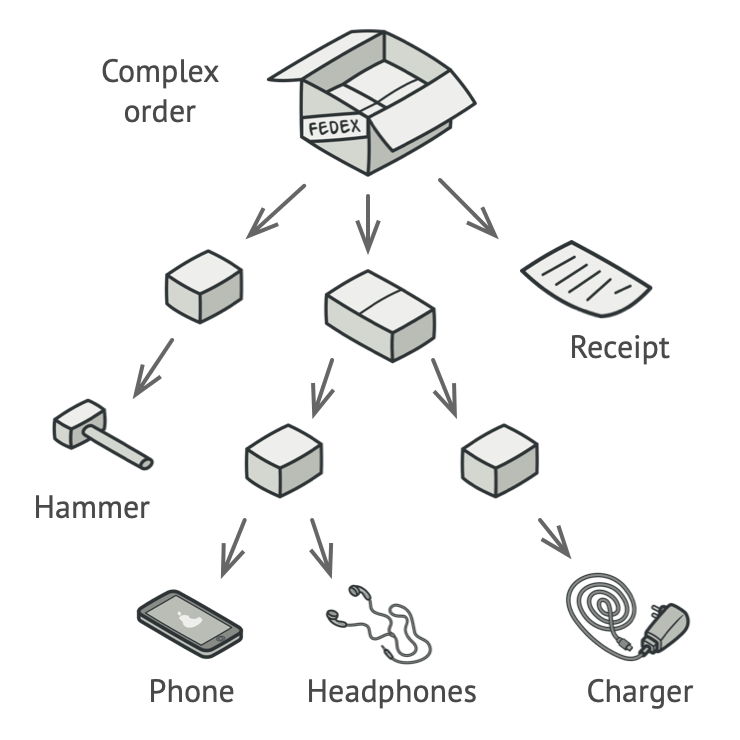
</div>


In [35]:
phone = Product(name="iPhone 14", weight=700)

In [36]:
headphone = Product(name="iPhone headphone", weight=100)

In [37]:
box_1 = Box(100, 100, 50)

In [38]:
box_1.add_items(phone, headphone)

In [39]:
charger = Product(name="iPhone Charger", weight=200)

In [40]:
box_2 = Box(50, 50, 20)

In [42]:
box_2.add_items(charger)

In [43]:
hammer = Product(name="Hammer", weight=1500)

In [44]:
box_3 = Box(200, 50, 20)

In [45]:
box_3.add_items(hammer)

In [46]:
box_4 = Box(150, 150, 70)

In [47]:
box_4.add_items(box_1, box_2)

In [48]:
box_4.content

[<__main__.Box at 0x104713640>, <__main__.Box at 0x10433d910>]

In [49]:
class Reciept(Product):
    def __init__(self):
        super().__init__(name="Recipt", weight=0)

In [50]:
reciept = Reciept()

In [51]:
parcel_1 = Parcel(destination_address="Baghramyan 26, Yerevan, Armenia", max_weight=1500)

In [52]:
parcel_1.add_items(box_3, box_4)

Exception: Can't fit this product into the box

In [53]:
parcel_1.add_items(box_4)

In [54]:
parcel_1.add_items(box_3)

Exception: Can't fit this product into the box

In [58]:
parcel_1.content[0].content

[<__main__.Box at 0x104713640>, <__main__.Box at 0x10433d910>]

## Observer

In [85]:
class Product:
    def __init__(self, name):
        self.name = name

    
class Shop:  # Publisher
    def __init__(self, name):
        self.name = name
        self.products = []
        self.subscribers = {
            'iphone': set(),
            'ipad': set(),
            'macbook': set(),
        }
    
    def add_subscriber(self, product_name, subscriber):
        self.subscribers[product_name].add(subscriber)

    def update_subscribers(self, product_name):
        for subscriber in self.subscribers[product_name]:
            subscriber.get_notified(product_name)
        
    def receive_new_product(self, product):
        self.products.append(product)
        self.update_subscribers(product.name)
        
        
class Subscriber(ABC):
    @abstractmethod
    def get_notified(self, event):
        raise NotImplementedError()
        
        
class Customer(Subscriber):  # Subscriber
    def __init__(self, name):
        self.name = name
        
    def get_notified(self, event):
        print("Omw to buy it")

In [86]:
customer_1 = Customer("Adam Smith")

In [87]:
customer_2 = Customer("Jack Adams")

In [88]:
product = Product('iphone')

In [89]:
shop_1 = Shop("iStore")

In [90]:
shop_1.add_subscriber('iphone', customer_1)
shop_1.add_subscriber('iphone', customer_1)
shop_1.add_subscriber('iphone', customer_1)
shop_1.add_subscriber('iphone', customer_1)
shop_1.add_subscriber('ipad', customer_2)

In [91]:
shop_1.receive_new_product(product)

Omw to buy it


In [92]:
shop_1.subscribers

{'iphone': {<__main__.Customer at 0x105dd2790>},
 'ipad': {<__main__.Customer at 0x105e5ccd0>},
 'macbook': set()}